![title](./cover.png)

# Misión
En esta práctica tu misión es obtener datos de todo el mundo para el sismo de M8.2 ocurrido en el Golfo de Tehuantepec ocurrido el 8 de septiembre del 2017 (UTC). Además, deberás de identificar las diferentes fases que se pueden observar y visualizar su trayectoria.
# Parte 1
La primera parte consiste en descargar los datos de la base de datos de **IRIS** utilizando la herramientas web que ofrece. Revisa el documento adjunto. Una vez obtenidas las formas de onda colocalas en el mismo directorio de trabajo. **Obspy** puede descargar los datos a través de forma autómatica, lo cual posiblemente realicemos en una práctica posterior. 

In [1]:
from obspy import read
import matplotlib.pyplot as plt
from obspy.signal.rotate import rotate_ne_rt
from obspy.taup import TauPyModel
%matplotlib inline

# Graficación
Una vez descargados los datos descomprimelos y guardalos en el mismo folder donde se encuentra este archivo de Jupyter. **Obspy** ofrece diversas herramientas de visualización, en la **Práctica 1** utilizamos el comando **obspy.plot()** en la modalidad **dayplot**, esta vez vamos a utilizar el mismo comando pero en la modalidad **section**. Esta modalidad permite graficar un conjunto de sismogramas ordenados por la distancia al sismo, para esto deben de agregar más información. En nuestro caso los datos ya contienen los datos necesarios para hacerlo, simplemente falta agregarlos al atributo correcto como lo indica la documentación <a href="https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.plot.html#obspy.core.stream.Stream.plot">obspy.plot()</a>.  

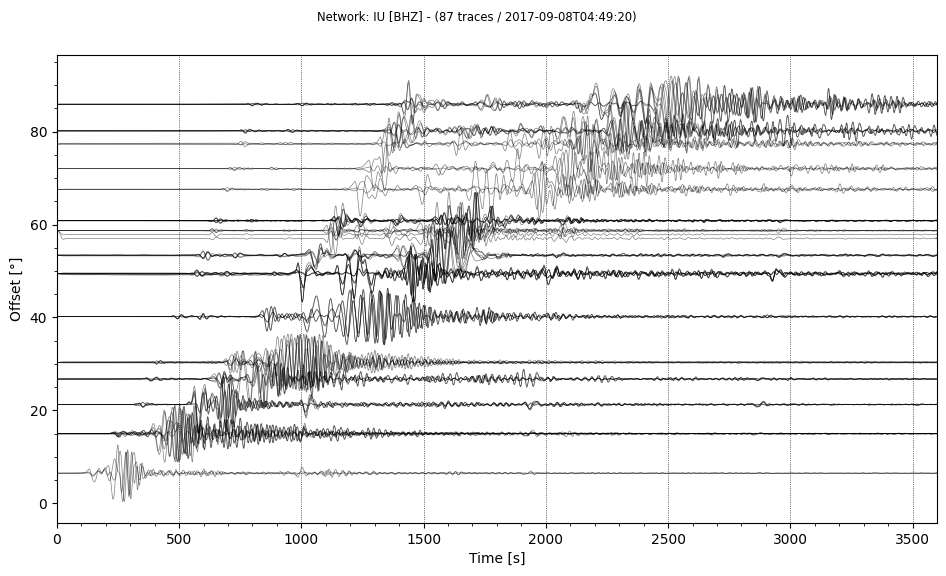

In [2]:
%matplotlib inline
# Escribe tu código aquí. ~1 línea
T             = None
all_waveforms = read("*.SAC")
waveforms     = all_waveforms.copy()
waveforms.filter("lowpass", freq=1./T)
for k in range(len(waveforms)):
    waveforms[k].stats.distance     = waveforms[k].stats.sac.dist*1000
    waveforms[k].stats.coordinates  = lambda: None
    setattr(waveforms[k].stats.coordinates, 'latitude',  waveforms[k].stats.sac.stla)
    setattr(waveforms[k].stats.coordinates, 'longitude', waveforms[k].stats.sac.stlo)
    
waveforms.plot(type='section', scale=10, linewidth=0.5,  orientation='horizontal', dist_degree=True,
                   ev_coord=(all_waveforms[k].stats.sac.evla,all_waveforms[k].stats.sac.evlo ));

# Rotación de los sismogramas
En general, las estaciones sísmicas se orientan con respecto al norte geográfico, de tal forma que sus tres componentes sea norte, este y la vertical. Sin embargo, en sismología es útil rotar el sistema de referencia de la tal forma que una de las componentes horizontales apunte hacia la dirección del sismo y la otra este orientada a 90 grados de ésta. Aunque se puede realizar a través de una matriz de rotación como lo hicimos en la **práctica 3**. **Obspy** tiene la función <a href="https://docs.obspy.org/master/packages/autogen/obspy.signal.rotate.rotate_ne_rt.html">**obspy.signal.rotate.rotate_ne_rt**</a> que realiza esta operación. Los parámetros de entrada de esta función son la componente **norte**, **este** y el ángulo de rotación, el cúal, recibe el nombre de **backazimuth**. 
![title](./figure_backazimuth.png)
En esta práctica, vamos a visualizar los datos de la con código **PTCN**. Localizado en las islas Pitcairn en el oceáno Pacífico. Esta estación cuenta con 2 instrumentos, uno ubicado en superfice, y otro en un pozo a **10 metros** de profundidad. 
## Canales
No existe una convención única para nombrar a los archivos, ni los canales. Típicamente, se utilizan 3 letras para denotar el canal, y 3-4 letras para el nombre de la estación. En el caso del nombre del canal, la primera letra comúnmente es **L**, **B** ó **H**. **L** frecuentemente representa **1 muestra** por segundo, **B** regularmente indíca **20 muestras** por segundo y la **H** más de **80 muestras** por segundo. La segunda letra indica la ganancia del instrumento, casí siempre se usa la letre **H** que signifíca ganancia alta (**High**). Por último, la tercera letra indica la dirección de la componente. Las notaciones más comúnes son **Z** o **U** para la verical, **E** para la componente **Este** y **N** para la componente norte. <br>
En el caso de la estación **PTCN** las componentes horizontales están señaladas con el siguiente código **BH1** y **BH2**. Para averiguar, en que dirección apuntan es necesario revisar las variable **cmpaz**, la cual se encuentra en el encabezado del archivo e indica el azimuth con respecto al norte geográfico. Si, **cmpaz=0** significa que la componente apunta hacia el Norte, y si es **cmpaz=90** indica que la componente apunta hacia el Este.
### Instrucciones
1. Utiliza el comando <a href="https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.select.html">obspy.core.stream.Stream.select</a> para separar la estación **PTCN** del resto del **stream**.

Station: PTCN Azimuth:  0.0 N
Station: PTCN Azimuth:  90.0 N
Latitud     del sismo:  15.0356
Longitud    del sismo:  -93.9067
Profundidad del sismo:  56.67
Distancia    al sismo:  5919.2 km.
Distancia    al sismo:  53.235  grados.
Backazimuth:            45.4087


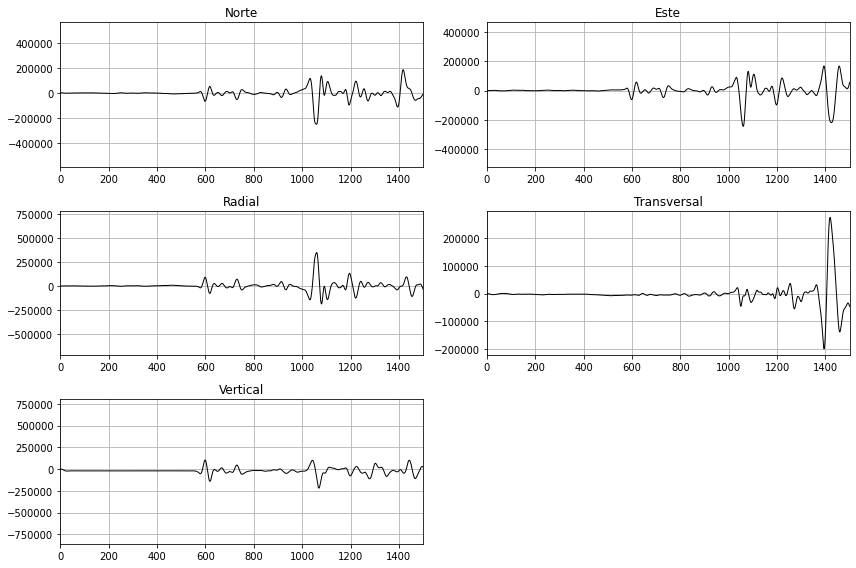

In [6]:
%matplotlib inline
# Escribe tu código aquí. ~2 líneas
Station_name = None
Location_sta = None
PTCN_N  = waveforms.select(station=Station_name, location=Location_sta,channel='BH1')
PTCN_E  = waveforms.select(station=Station_name, location=Location_sta,channel='BH2')
PTCN_Z  = waveforms.select(station=Station_name, location=Location_sta,channel='BHZ')
print('Station:', PTCN_N[0].stats.sac.kstnm, 'Azimuth: ', PTCN_N[0].stats.sac.cmpaz, 'N')
print('Station:', PTCN_E[0].stats.sac.kstnm, 'Azimuth: ', PTCN_E[0].stats.sac.cmpaz, 'N')
print('Latitud     del sismo: ', PTCN_N[0].stats.sac.evla)
print('Longitud    del sismo: ', PTCN_N[0].stats.sac.evlo)
print('Profundidad del sismo: ', PTCN_N[0].stats.sac.evdp)
print('Distancia    al sismo: ', PTCN_N[0].stats.sac.dist, 'km.')
print('Distancia    al sismo: ', PTCN_N[0].stats.sac.gcarc, ' grados.')
print('Backazimuth:           ', PTCN_N[0].stats.sac.baz)

backazimuth = PTCN_N[0].stats.sac.baz
depth       = PTCN_N[0].stats.sac.evdp
gcarc       = PTCN_N[0].stats.sac.gcarc


#PTCN_ROT = POHA.copy()
rotate     = rotate_ne_rt(PTCN_N[0].data, PTCN_E[0].data, backazimuth)
radial     = rotate[0]
transverse = rotate[1]
time       = PTCN_N[0].times()

x_max=1500

plt.figure(figsize=(12,8));

plt.subplot(321);
plt.plot(time, PTCN_N[0].data, linewidth=1.0, color='k')
plt.grid()
plt.title('Norte')
plt.xlim(0, x_max)
plt.tight_layout()

plt.subplot(322);
plt.plot(time, PTCN_E[0].data, linewidth=1.0, color='k')
plt.title('Este')
plt.grid()
plt.xlim(0, x_max)
plt.tight_layout()

plt.subplot(323);
plt.plot(time, radial, linewidth=1, color='k');
plt.title('Radial')
plt.xlim(0, x_max)
plt.grid()
plt.tight_layout()

plt.subplot(324);
plt.plot(time, transverse, linewidth=1, color='k');
plt.title('Transversal')
plt.xlim(0, x_max)
plt.grid()
plt.tight_layout()


plt.subplot(325);
plt.plot(time, PTCN_Z[0].data, linewidth=1, color='k')
plt.title('Vertical')
plt.grid()
plt.xlim(0, x_max)
plt.tight_layout()

plt.show();

# Fases sísmicas
A continuación vamos a analizar las diferentes fases sísmicas que se observan en el sismograma. **Obspy** cuenta con la librería <a href="https://docs.obspy.org/packages/obspy.taup.html">obspy.taup</a>. Esta librería te permite calcular los tiempos de arribo de las diferentes fases en función de la distancia a la estación (en grados) y la profundidad del evento.

## Instrucciones
1. Reutiliza tus variable que utilizaste anteriormente para calcular los tiempos de arribo.
2. ¿cuantos fases puedes distingir en tus sismogrmas?

In [7]:
# Escribe tu código aquí. ~1 línea
Modelo = None
model  = TauPyModel(model=None)
arrivals = model.get_travel_times(source_depth_in_km= depth, distance_in_degree = gcarc)
print(arrivals)

33 arrivals
	P phase arrival at 552.133 seconds
	pP phase arrival at 566.089 seconds
	sP phase arrival at 572.891 seconds
	PcP phase arrival at 618.863 seconds
	PP phase arrival at 672.429 seconds
	PP phase arrival at 676.726 seconds
	PP phase arrival at 677.677 seconds
	PP phase arrival at 732.582 seconds
	PP phase arrival at 734.369 seconds
	ScP phase arrival at 851.867 seconds
	PcS phase arrival at 858.355 seconds
	S phase arrival at 1000.277 seconds
	SP phase arrival at 1005.453 seconds
	PKiKP phase arrival at 1014.903 seconds
	sS phase arrival at 1025.138 seconds
	pPKiKP phase arrival at 1030.765 seconds
	sPKiKP phase arrival at 1037.116 seconds
	ScS phase arrival at 1137.028 seconds
	SKiKP phase arrival at 1222.809 seconds
	SS phase arrival at 1224.491 seconds
	SS phase arrival at 1243.750 seconds
	SS phase arrival at 1245.566 seconds
	SS phase arrival at 1288.320 seconds
	SS phase arrival at 1288.387 seconds
	SS phase arrival at 1323.457 seconds
	SS phase arrival at 1327.035 sec

Finalmente, vamos a visulizar las trayectorias de propagación para cada una de las fases. 
## Instruciones 
1. Visuliza las fases: **P**, **S**, **SS** y **ScS**.

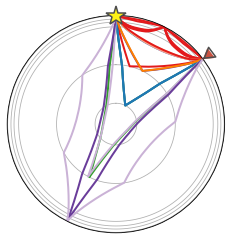

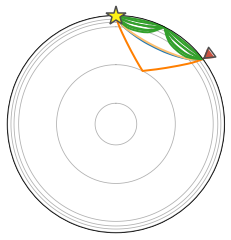

In [8]:
# Escribe tu código aquí. ~1 línea
Fases    = None 
arrivals = model.get_ray_paths(source_depth_in_km=depth, distance_in_degree=gcarc, phase_list=["ttbasic"])
ax = arrivals.plot_rays()
arrivals = model.get_ray_paths(source_depth_in_km=depth, distance_in_degree=gcarc, phase_list=Fases)
ax = arrivals.plot_rays()


# Conclusiones
¿Cúantas fases pudiste identificar?